In [311]:
import pandas as pd
import numpy as np
import arff
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:

with open('dataset', 'r', encoding='utf-8') as f:
    dataset = arff.load(f)


df = pd.DataFrame(dataset['data'], columns=[a[0] for a in dataset['attributes']])

## Data analysis

In [313]:
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,class
0,1,3,7,4,41,2,17,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,5,1,1,3,64,0,10,0,0,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,2,1,1,2,39,0,8,0,0,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,3,1,1,1,39,2,12,0,0,1,...,No,No,No,No,No,No,No,No,No,NO
4,3,1,1,3,21,2,23,1,0,0,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [314]:
df.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   admission_type_id         101766 non-null  int64 
 1   discharge_disposition_id  101766 non-null  int64 
 2   admission_source_id       101766 non-null  int64 
 3   time_in_hospital          101766 non-null  int64 
 4   num_lab_procedures        101766 non-null  int64 
 5   num_procedures            101766 non-null  int64 
 6   num_medications           101766 non-null  int64 
 7   number_outpatient         101766 non-null  int64 
 8   number_emergency          101766 non-null  int64 
 9   number_inpatient          101766 non-null  int64 
 10  number_diagnoses          101766 non-null  int64 
 11  race                      99493 non-null   object
 12  gender                    101766 non-null  object
 13  age                       101766 non-null  object
 14  weig

In [316]:
null_count = df.isnull().sum()
print(null_count)

admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
race                         2273
gender                          0
age                             0
weight                      98569
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [317]:
numeric_val = df.select_dtypes(include=np.number)
object_val = df.select_dtypes(include='object')

In [318]:
numeric_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   admission_type_id         101766 non-null  int64
 1   discharge_disposition_id  101766 non-null  int64
 2   admission_source_id       101766 non-null  int64
 3   time_in_hospital          101766 non-null  int64
 4   num_lab_procedures        101766 non-null  int64
 5   num_procedures            101766 non-null  int64
 6   num_medications           101766 non-null  int64
 7   number_outpatient         101766 non-null  int64
 8   number_emergency          101766 non-null  int64
 9   number_inpatient          101766 non-null  int64
 10  number_diagnoses          101766 non-null  int64
dtypes: int64(11)
memory usage: 8.5 MB


In [319]:
object_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   payer_code                61510 non-null   object
 5   medical_specialty         51817 non-null   object
 6   diag_1                    101745 non-null  object
 7   diag_2                    101408 non-null  object
 8   diag_3                    100343 non-null  object
 9   max_glu_serum             101766 non-null  object
 10  A1Cresult                 101766 non-null  object
 11  metformin                 101766 non-null  object
 12  repaglinide               101766 non-null  object
 13  nateglinide               101766 non-null  object
 14  chlo

- During data analysis, we found that our dataset has dimensions of 191766 rows and 48 columns

- The column types were numeric and object. There was not a single non-null value in the numeric columns (10 columns). There were more such columns in the object columns (other columns)

## Data preprocessing and normalization

In [320]:
def interval_to_mean(value):
    """Function from interval fo format [...) returns mean of two numbers"""
    parts = value.replace('[', '').replace(']', '').replace('(', '').replace(')', '').split('-')
    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return (int(parts[0]) + int(parts[1])) / 2

In [321]:
null_percent = (null_count / len(df)) * 100
cols_over_30 = null_percent[null_percent > 30]
cols_to_drop = cols_over_30.index.tolist()
df = df.drop(cols_to_drop, axis='columns')

- removing columns that have more than 30% NaN values

In [322]:
df = df.drop_duplicates()

- removing duplicates

In [323]:
df['age'] = df['age'].apply(interval_to_mean)
df.loc[(df['age'] < 0) | (df['age'] > 110), 'age'] = np.nan
df['age'] = df['age'].fillna(0)

- normalizing the $age$ column to the mean of the interval

In [324]:
numeric_col: list[str] = df.select_dtypes(include='number').columns # type: ignore

In [325]:
for col in df.select_dtypes(include='object').columns:
    converted = pd.to_numeric(df[col], errors='coerce')
    
    if converted.notna().mean() > 0.5:
        df[col] = converted


- if a column has more than 50% numeric values, then the column should be of type numeric and not object

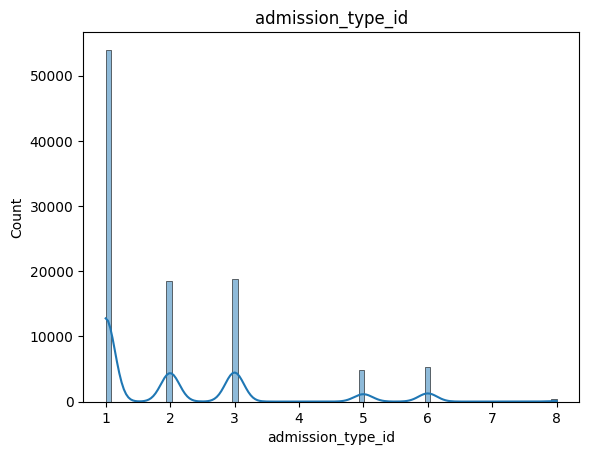

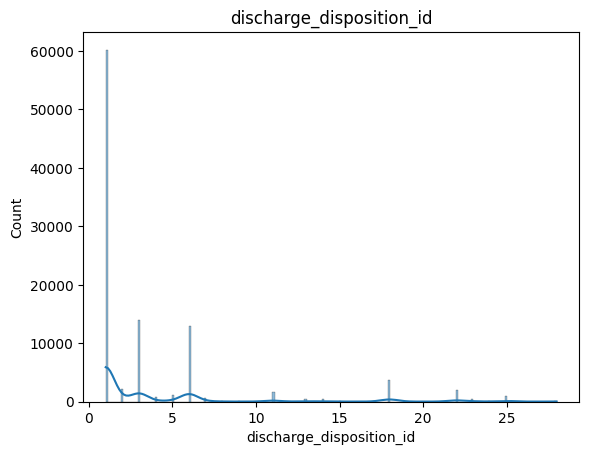

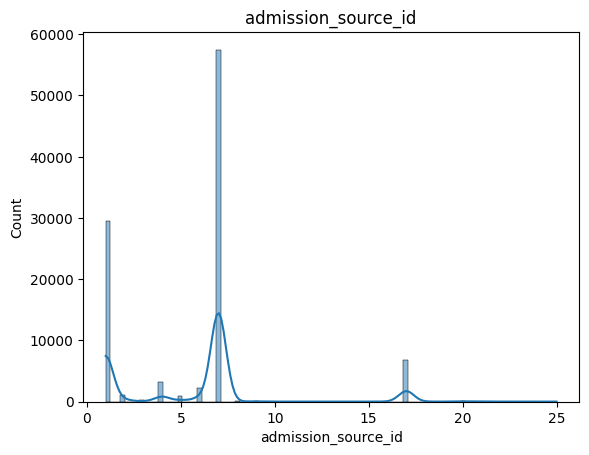

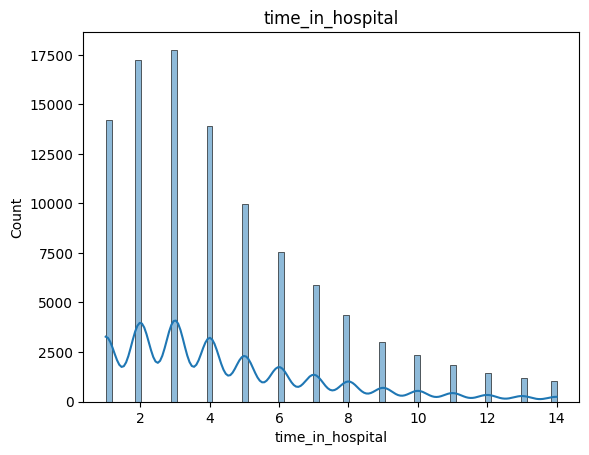

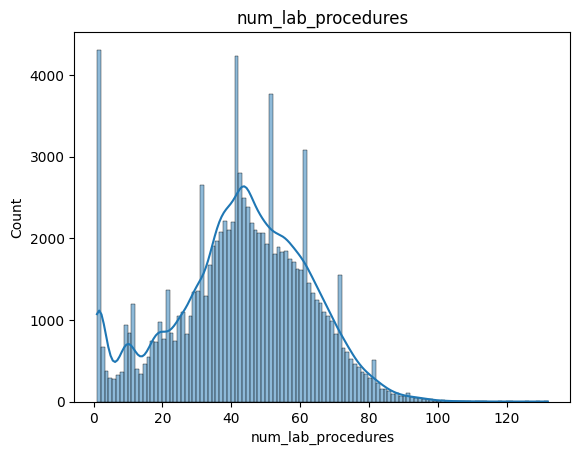

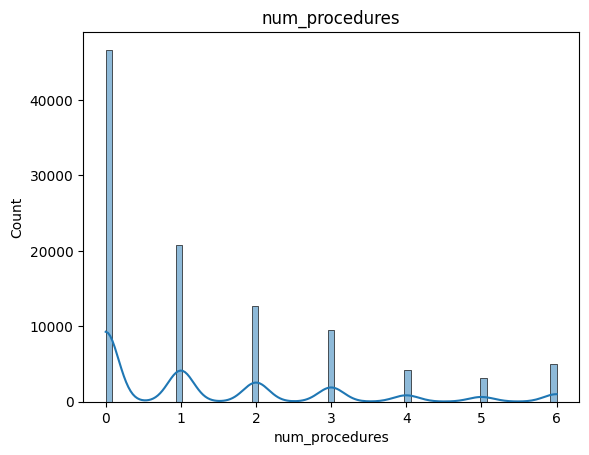

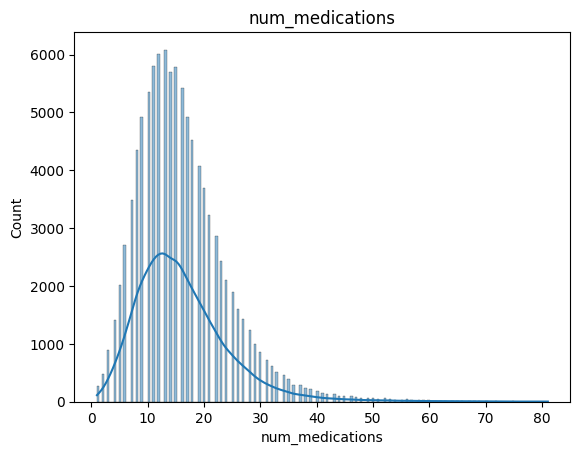

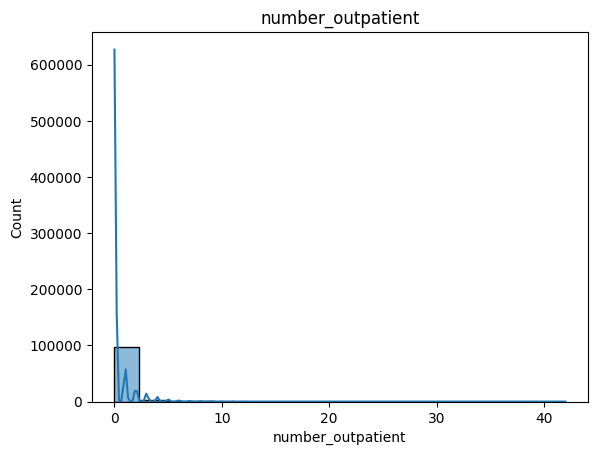

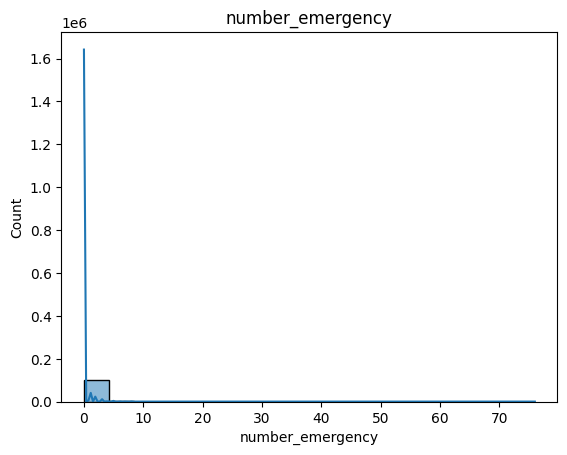

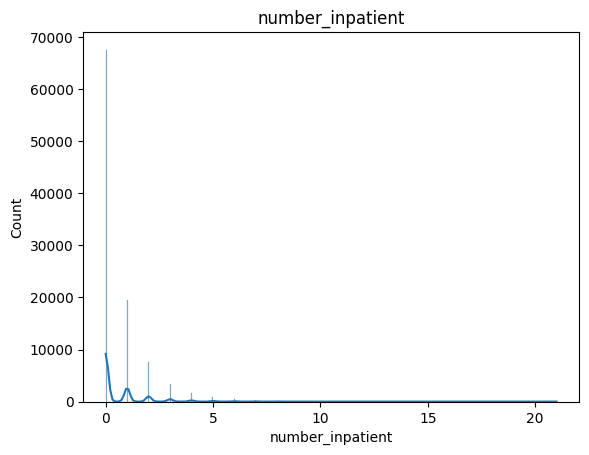

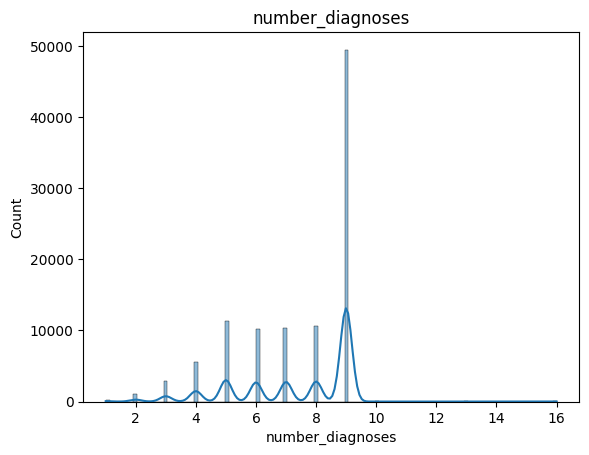

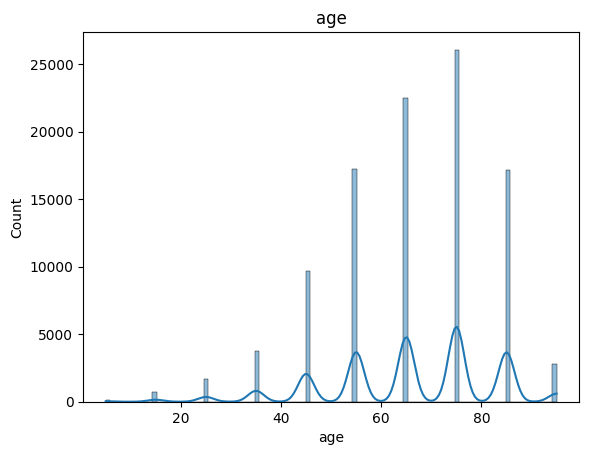

In [326]:
for col in numeric_col:
    sns.histplot(data=df[col], kde=True) # type: ignore
    plt.title(col)
    plt.show()

In [327]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_b = Q1 - 1.5 * iqr
    upper_b = Q3 + 1.5 * iqr
    
    df.loc[(df[col] < lower_b) | (df[col] > upper_b), col] = np.nan
    df[col] = df[col].fillna(df[col].median())
    df[col] = np.log1p(df[col])

- re-format outlayers using log transformation

<Axes: >

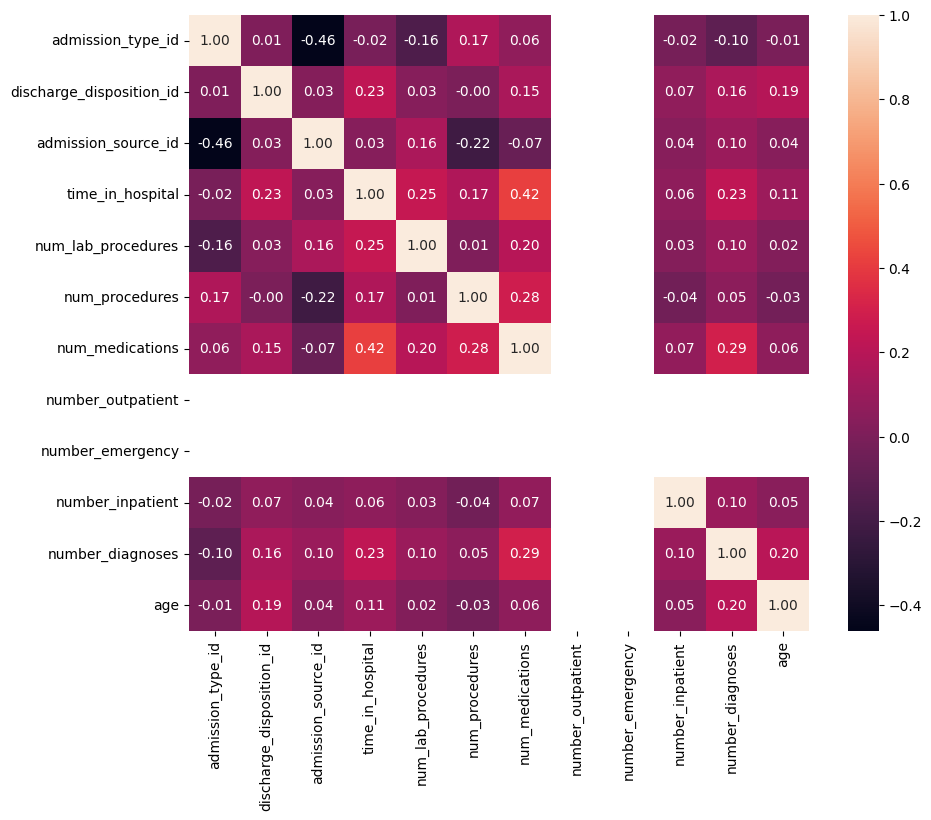

In [328]:
plt.figure(figsize=(10, 8))

sns.heatmap(data=df[numeric_col].corr(),
            cmap="rocket",
            annot=True,
            fmt=".2f"
            )


- on the heatmap we can see that two columns have no values, it is necessary to investigate this further, possibly remove the column

In [329]:
df['number_outpatient'].nunique() == 1

True

In [330]:
df['number_emergency'].nunique() == 1

True

In [331]:
df = df.drop(["number_emergency", "number_outpatient"], axis="columns")

- we removed the columns (number_emergency, number_outpatient) because they only had the value 0